In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('tb_lobby_stats_player.csv', parse_dates = ['dtCreatedAt'])
df2 = pd.read_csv('tb_medalha.csv')
df3 = pd.read_csv('tb_players_medalha.csv', parse_dates = ['dtCreatedAt', 'dtExpiration','dtRemove'])
df4 = pd.read_csv('tb_players.csv', parse_dates = ['dtBirth','dtRegistration'])

In [3]:
df4.drop(['flFacebook','flTwitter', 'flTwitch'], axis=1, inplace=True)
df1.drop(['qtPlusKill'], axis=1, inplace=True)

In [4]:
print('lobby {}'.format(df1.shape))
print('medalha {}'.format(df2.shape))
print('players medalha {}'.format(df3.shape))
print('players {}'.format(df4.shape))

lobby (184152, 37)
medalha (47, 3)
players medalha (32700, 7)
players (2716, 4)


In [5]:
df = df1.merge(df4, left_on='idPlayer', right_on='idPlayer')
df_pmedal = df3.merge(df2, left_on = 'idMedal', right_on='idMedal')

In [6]:
import missingno as msno

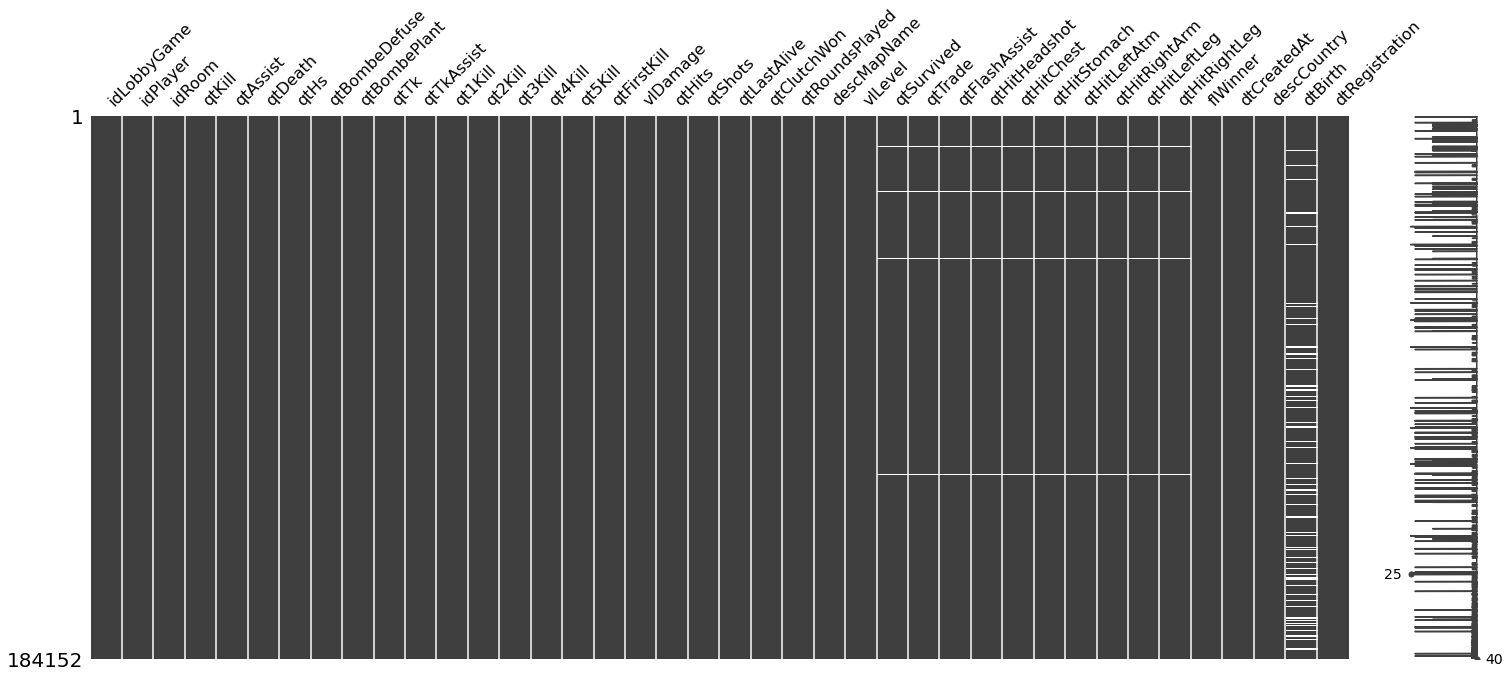

In [7]:
msno.matrix(df);

In [8]:
filtro = df.dtBirth.isnull()
niver_null = df.loc[filtro]
len(niver_null.idPlayer.unique())

600

In [12]:
#temos 600 jogadores sem informar sua data de nascimento

In [9]:
niver_null.idLobbyGame.count()

23209

In [13]:
# e eles jogaram 23209 jogos.

In [10]:
df.groupby('idPlayer')['idLobbyGame'].count().sort_values(ascending = False)

idPlayer
1922    873
1663    746
2289    677
20      666
1335    625
       ... 
604       1
1794      1
2578      1
622       1
1086      1
Name: idLobbyGame, Length: 2469, dtype: int64

In [11]:
df.dropna(subset=['qtSurvived'], inplace = True)

In [14]:
df.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt,descCountry,dtBirth,dtRegistration
0,1,1,1,5,1,16,2,0,0,0.0,...,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44,cl,NaT,2021-03-19 21:31:39
1,2,1,2,24,3,18,6,0,4,0.0,...,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47,cl,NaT,2021-03-19 21:31:39
2,3,2,3,6,4,23,2,0,1,0.0,...,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43,br,NaT,2020-05-06 19:28:29
3,4,2,4,8,4,26,6,0,2,0.0,...,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45,br,NaT,2020-05-06 19:28:29
4,5,2,5,10,1,11,5,0,3,0.0,...,8.0,0.0,0.0,3.0,0.0,1,2021-09-29 22:05:47,br,NaT,2020-05-06 19:28:29


In [15]:
df.to_csv('CSGO_merge.csv')